# Metody inteligencji obliczeniowej - Sprawozdanie 3

# Aproksymacja funkcji

### Yuliya Zviarko, 02.04.25


# Wprowadzenie

Na kolejnych ćwiczeniach mieliśmy styczność z zagadnieniem **aproksymacji funkcji** - przybliżania jednej funkcji za pomocą innej. Poznaliśmy dla tego różne metody, takie jak aproksymacja wielomianowa i trygonometryczna. Skupiliśmy się także na wykorzystaniu MLPRegressor do aproksymacji danych. Omówiliśmy miary jakości aproksymacji, takie jak **MSE**, **RMSE**, **MAPE** oraz współczynnik determinacji **$R^2$**


W ramach zadań praktycznych trenowaliśmy sieci neuronowe do aproksymacji różnych funkcji i zbiorów danych. Badaliśmy wpływ architektury sieci (liczba neuronów, warstwy, funkcje aktywacji) na dokładność aproksymacji.


# Przebieg laboratorium

# Zadanie 1

W zadaniu pierwszym należało pobrać plik advertising.csv, który zawierał dane na temat wydatków na reklamę telewizyjną, radiową i prasową dla pojedynczego produktu oraz związane z tym zyski ze sprzedaży. Zyski te można przedstawić jako funkcję zależności:

    $Z(w_{TV}, w_{radio}, w_{prasa}

Celem zadania było zaproponowanie architektury sieci neuronowej, która dokona aproksymacji tej funkcji. Dodatkowo należało przeprowadzić ewaluację zaproponowanej sieci, porównując wyniki (błąd średniokwadratowy, MSE) dla przynajmniej dwóch różnych struktur sieci, różniących się liczbą neuronów, oraz dla dwóch różnych funkcji aktywacji (ReLU i tanh).

In [2]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_california_housing
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
# Wczytujemy i przygotujemy dane:
data_ad = pd.read_csv('Advertising.csv', sep = ',', header = None)
data_ad = data_ad.drop(0)
data_ad = data_ad.iloc[:,1:]
print(data_ad)

         1     2     3     4
1    230.1  37.8  69.2  22.1
2     44.5  39.3  45.1  10.4
3     17.2  45.9  69.3   9.3
4    151.5  41.3  58.5  18.5
5    180.8  10.8  58.4  12.9
..     ...   ...   ...   ...
196   38.2   3.7  13.8   7.6
197   94.2   4.9   8.1   9.7
198    177   9.3   6.4  12.8
199  283.6    42  66.2  25.5
200  232.1   8.6   8.7  13.4

[200 rows x 4 columns]


In [8]:
X = data_ad.iloc[:, 0:3].to_numpy().astype(float)
y = data_ad.iloc[:, 3].to_numpy().astype(float)

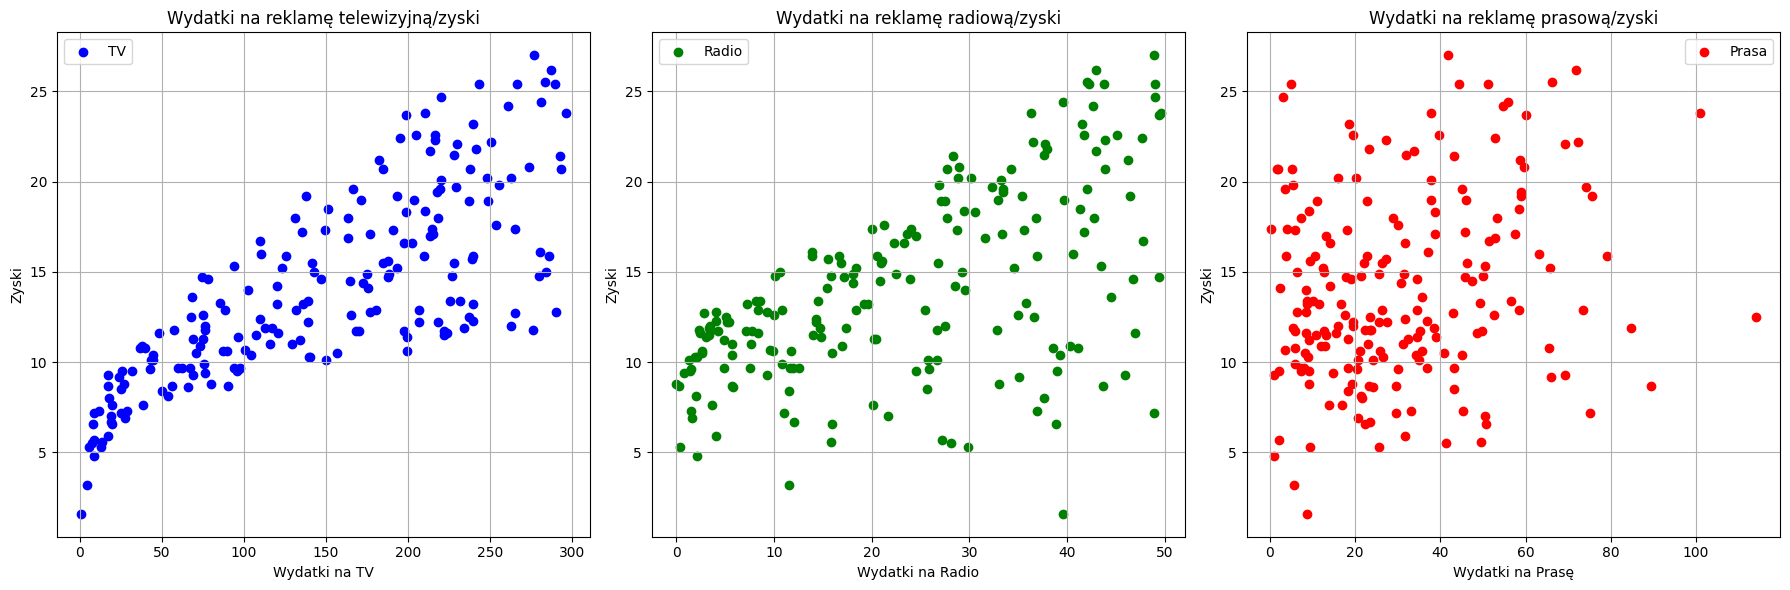

In [33]:
# Wizualizacja danych wejściowych
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].scatter(X[:, 0], y, color='blue', label='TV')
axes[0].set_title('Wydatki na reklamę telewizyjną/zyski')
axes[0].set_xlabel('Wydatki na TV')
axes[0].set_ylabel('Zyski')
axes[0].grid(True)
axes[0].legend()

axes[1].scatter(X[:, 1], y, color='green', label='Radio')
axes[1].set_title('Wydatki na reklamę radiową/zyski')
axes[1].set_xlabel('Wydatki na Radio')
axes[1].set_ylabel('Zyski')
axes[1].grid(True)
axes[1].legend()

axes[2].scatter(X[:, 2], y, color='red', label='Prasa')
axes[2].set_title('Wydatki na reklamę prasową/zyski')
axes[2].set_xlabel('Wydatki na Prasę')
axes[2].set_ylabel('Zyski')
axes[2].grid(True)
axes[2].legend()

plt.tight_layout()
# plt.show()

In [31]:
# Podział na zbiór trenujący a testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Wybrałam następujące dwie struktury sieci oraz funkcje aktywacji.
structures = [(1,1), (20, 20), (100, 100, 100, 100, 100)]
activation_functions = ['relu', 'tanh']

# Wszystkie wyniki zostaną zapisane w 'results':
results = []

# Trening i walidacja modelu:
for structure in structures:
    for activation_function in activation_functions:
        network = MLPRegressor(solver='adam', hidden_layer_sizes=structure, max_iter=2000, tol=0.001, activation=activation_function)
        network.fit(X_train, y_train)
        predicted = network.predict(X_test)

        MSE_network = mean_squared_error(y_test, predicted)
        score_network = network.score(X_test, y_test)

        # Zapisujemy otrzymany wynki
        results.append((activation_function, structure, MSE_network, score_network))
        print(f"funkcja Aktywacji: {activation_function}, struktura: {structure} ----> MSE: {MSE_network:.4f}, Score: {score_network:.4f}")


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


funkcja Aktywacji: relu, struktura: (1, 1) ----> MSE: 142.8562, Score: -3.5260


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


funkcja Aktywacji: tanh, struktura: (1, 1) ----> MSE: 123.6780, Score: -2.9184
funkcja Aktywacji: relu, struktura: (20, 20) ----> MSE: 27.5831, Score: 0.1261
funkcja Aktywacji: tanh, struktura: (20, 20) ----> MSE: 1.9144, Score: 0.9393
funkcja Aktywacji: relu, struktura: (100, 100, 100, 100, 100) ----> MSE: 3.5360, Score: 0.8880
funkcja Aktywacji: tanh, struktura: (100, 100, 100, 100, 100) ----> MSE: 0.8351, Score: 0.9735


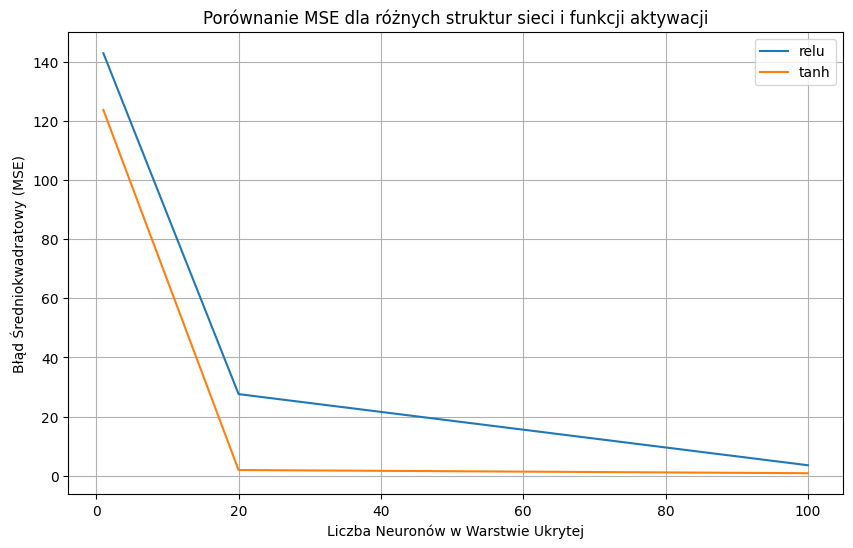

In [32]:
# Dla lepszego zrozumienia wyników - narysujmy wykresy porównawcze MSE dla różnych struktur i funkcji aktywacji:
mse_values = np.array([[result[2] for result in results if result[0] == activation_function and result[1] == structure]
                       for structure in structures for activation_function in activation_functions])

fig, ax = plt.subplots(figsize=(10, 6))
for i, activation_function in enumerate(activation_functions):
    ax.plot([structure[0] for structure in structures], mse_values[i::len(activation_functions)], label=activation_function)

ax.set_xlabel('Liczba Neuronów w Warstwie Ukrytej')
ax.set_ylabel('Błąd Średniokwadratowy (MSE)')
ax.set_title('Porównanie MSE dla różnych struktur sieci i funkcji aktywacji')
ax.legend()
plt.grid(True)
plt.show()

Analizując otrzymane wyniki, widać, że najlepszą konfiguracją okazała się sieć o strukturze (100, 100, 100, 100, 100) z funkcją aktywacji **tanh**, która osiągnęła najniższą wartość błędu średniokwadratowego (MSE = 0.8351) oraz najwyższy współczynnik dopasowania (Score = 0.9735).
😄

Eksperyment ze zmienną liczbą neuronów wyraźnie pokazuje, że większa liczba neuronów w warstwach ukrytych znacząco poprawia zdolność sieci do modelowania danych.

Porównanie wartości MSE dla różnych struktur sieci i funkcji aktywacji wskazuje, że **tanh** wykazuje lepszą stabilność, osiągając wartości MSE zbliżone do zera.

Najprostsze modele (1,1), jak pokazują wyniki testów, nie nadają się do tego zadania, ponieważ osiągnęły bardzo wysokie wartości MSE i niskie Score.

A więc kluczowe jest zastosowanie **odpowiedniej liczby neuronów** oraz wybór **stabilnych funkcji aktywacji**.

# Zadanie 2

W drugim zadaniu należało utworzyć sieć neuronową (najlepiej z jedną warstwą ukrytą) do aproksymacji funkcji **sinus'a** w przedziale od $-2π$ do $2π$, wykorzystując **tanh** jako funkcję aktywacji.

Na koniec należało zaprezentować zarówno funkcję aproksymowaną, jak i aproksymującą.
Dodatkowo, korzystając z dostępu do wag i biasów

    **(network.coefs_ oraz network.intercepts_)**,

należało zapisać wzór funkcji aproksymującej.

Wzór funkcji aproksymująca:
Neuron 1: f(x) = tanh(0.2580 * x + 1.1216)


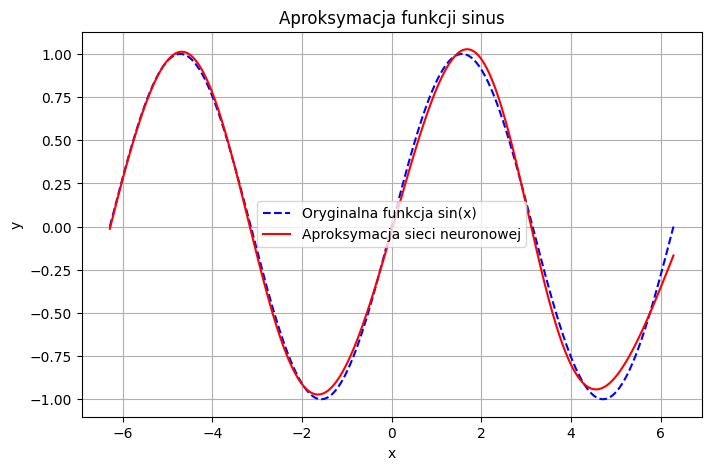

In [44]:
# Tworzenie zbioru treningowego (Na początku definiujemy przedzial a potem funckje sinus'a)
X_train = np.linspace(-2 * np.pi, 2 * np.pi, 100).reshape(-1, 1)
y_train = np.sin(X_train).ravel()

# Definicja i trenowanie sieci
network = MLPRegressor(solver="lbfgs", hidden_layer_sizes=(4), max_iter=2000, tol=0.001, activation='tanh')
network.fit(X_train, y_train)

# Tworzenie zbioru testowego
X_test = np.linspace(-2 * np.pi, 2 * np.pi, 1000).reshape(-1, 1)
y_test = np.sin(X_test).ravel()
# Aproksymowane wartości
y_test_approx = network.predict(X_test)


print("Wzór funkcji aproksymującej:")
for i in range(len(network.coefs_[0])):
    print(f"Neuron {i+1}: f(x) = tanh({network.coefs_[0][i][0]:.4f} * x + {network.intercepts_[0][i]:.4f})")

plt.figure(figsize=(8, 5))
plt.plot(X_test, y_test, label='Oryginalna funkcja sin(x)', color='blue', linestyle='dashed')
plt.plot(X_test, y_test_approx, label='Aproksymacja sieci neuronowej', color='red')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Aproksymacja funkcji sinus")
plt.legend()
plt.grid()
plt.show()

Sieć doskonale aproksymuje funkcję sinus w zadanym przedziale metodą lbfgs, co jest wyraźnie widoczne na przedstawionym wykresie.

Zastosowana funkcja aktywacji tanh ponownie sprawdziła się bardzo dobrze, zapewniając stabilność i dokładność aproksymacji.

Wykorzystanie tylko 4 neuronów w jednej warstwie ukrytej okazało się wystarczające do wiernego odwzorowania funkcji sinus. Choć zwiększenie liczby neuronów mogłoby jeszcze poprawić dokładność modelu, mogłoby również prowadzić do ryzyka przeuczenia.

Otrzymany wzór funkcji aproksymującej wskazuje na dobrze dobraną wartość wagi w ≈ 0.3:

$f(x) = tanh(0.2580 * x + 1.1216).$

# Zadanie 3

W tym zadaniu mieliśmy styczność z rzeczywistym zbiorem danych medycznych Diabetes z biblioteki **sklearn.datasets**. Celem było przewidywanie stopnia zaawansowania cukrzycy na podstawie zestawu cech opisujących pacjenta.



Należało przeskalować dane do jednej skali oraz podzielić je na zbiór uczący i testowy. Następnie należało zaproponować co najmniej 5 różnych architektur sieci neuronowych, dla każdej z nich obliczyć metryki oceny jakości modelu: MSE, MAPE i $R^2$.

Dla najlepszego modelu należało wykonać wykres porównujący wartości rzeczywiste (oś X) i przewidywane (oś Y). W idealnym przypadku punkty powinny układać się wzdłuż prostej $y=x$, co wskazywałoby na doskonałą zgodność predykcji z rzeczywistością.

Na koniec należało zastanowić się nad pytaniem:

"Jak architektura sieci wpływa na jakość aproksymacji i jaka jest najmniejsza sieć, która daje zadowalające wyniki?"

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


(10, 10, 10)
MSE: 2690.8976
MAPE: 0.3642
R^2: 0.4921


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


(20, 20, 20, 20, 20)
MSE: 3219.0279
MAPE: 0.4099
R^2: 0.3924


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


(50, 50, 50, 50, 50)
MSE: 8135.8122
MAPE: 0.6101
R^2: -0.5356
(100, 100, 100, 100, 100)
MSE: 4449.7120
MAPE: 0.4372
R^2: 0.1601
(300, 300, 300, 300, 300)
MSE: 4075.1938
MAPE: 0.4388
R^2: 0.2308


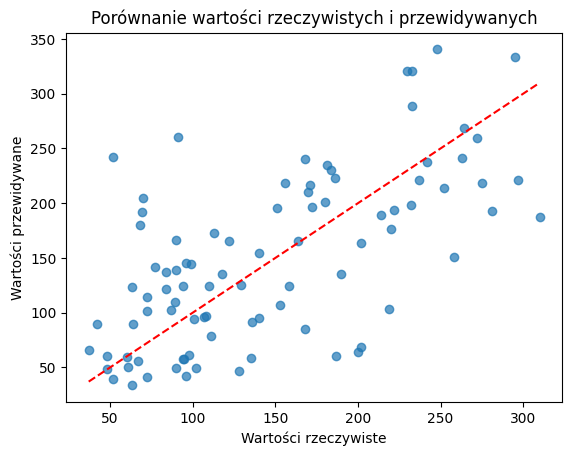

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

# Wczytanie zbioru danych Diabetes, ich normalizacja oraz podzila na zbór testujący a trenujący
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Wybrałam następujące architektury sieci:
structure = [(10,10,10), (20,20,20,20,20), (50,50,50,50,50), (100,100,100,100,100), (300,300,300,300,300)]

for structure in structure:
  # Tworzenie i trenowanie modelu
  mlp = MLPRegressor(hidden_layer_sizes=structure, activation='relu', solver='adam', max_iter=1000, random_state=42)
  mlp.fit(X_train, y_train)
  y_pred = mlp.predict(X_test)

  # Obliczenie MSE, MAPE i 𝑅^2
  mse = mean_squared_error(y_test, y_pred)
  mape = mean_absolute_percentage_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  print(structure)
  print(f"MSE: {mse:.4f}")
  print(f"MAPE: {mape:.4f}")
  print(f"R^2: {r2:.4f}")

plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Linia y=x
plt.xlabel('Wartości rzeczywiste')
plt.ylabel('Wartości przewidywane')
plt.title('Porównanie wartości rzeczywistych i przewidywanych')
plt.show()

Architektura sieci neuronowej ma wpływ na jakość predykcji:

Najlepsze wyniki uzyskał model o najmniejszej architekturze (10,10,10), dla którego MSE wyniosło $2690.90$, MAPE $0.3642$, a R² $0.4921$. Do tego wykres porównujący wartości rzeczywiste i przewidywane pokazuje, że sieć generuje predykcje dość bliskie linii $y=x$.


🐤 🧏

Bardziej złożone modele niekoniecznie dają lepsze wyniki:

Sieci o większej liczbie neuronów, takie jak (50,50,50,50,50) czy (100,100,100,100,100), osiągnęły znacznie wyższe błędy i niższe R², może w tym leżać zwykły problem przeuczenia się. Największa sieć (300,300,300,300,300) również nie poprawiła wyników, co pokazuje, że dodawanie kolejnych warstw nie zawsze prowadzi do lepszej aproksymacji.

# Zadanie 4

Bazując się na powyższym zbiorze danych, dla wybranych struktur sieci (np. najlepszej otrzymanej sieci), należało wykonać wykresy zależności ilości wykonanych przez sieć epok oraz dwóch wybranych metryk. Uzyskane wyniki trzeba przeanalizować we wnioskach.


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron

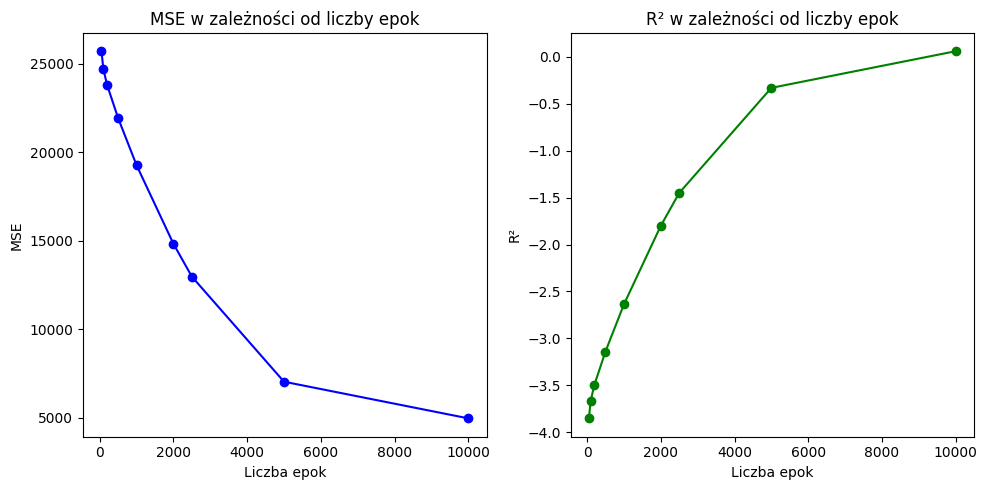

In [5]:
struct = (10,10,10) # najlepsza struktura z zadania trzeciego

# Lista epok do testowania
epochs = [50, 100, 200, 500, 1000, 2000, 2500, 5000, 10000]
mse_values = []
r2_values = []

# Trening modelu dla różnych liczby epok
for epoch in epochs:
    mlp = MLPRegressor(hidden_layer_sizes=struct, activation='tanh', solver='adam',
                       max_iter=epoch, random_state=42)
    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mse_values.append(mse)
    r2_values.append(r2)



# MSE/liczba epok
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, mse_values, marker='o', linestyle='-', color='b')
plt.xlabel('Liczba epok')
plt.ylabel('MSE')
plt.title('MSE w zależności od liczby epok')

# R²/liczba epok
plt.subplot(1, 2, 2)
plt.plot(epochs, r2_values, marker='o', linestyle='-', color='g')
plt.xlabel('Liczba epok')
plt.ylabel('R²')
plt.title('R² w zależności od liczby epok')
plt.tight_layout()
plt.show()

Analizując wykres, zauważamy, że początkowo R² szybko rośnie, a MSE maleje. Po około 4000 epok wartości te stabilizują się, a dalszy wzrost liczby epok nie przynosi już nagłych zmian. Prawdopodobnie w tym momencie dochodzi do przeuczenia. Dla eksperymentu powtórzyłam powyższe kroki, dodając learning_rate_init=0.01.

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron

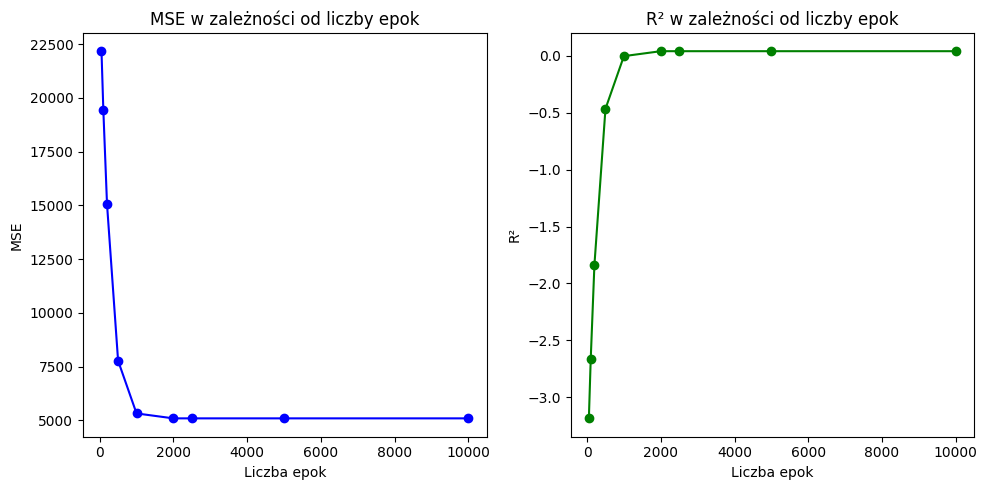

In [7]:
struct = (10,10,10)
epochs = [50, 100, 200, 500, 1000, 2000, 2500, 5000, 10000]
mse_values = []
r2_values = []

for epoch in epochs:
    mlp = MLPRegressor(hidden_layer_sizes=struct, activation='tanh', solver='adam',
                       max_iter=epoch, random_state=42, learning_rate_init=0.01)
    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mse_values.append(mse)
    r2_values.append(r2)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, mse_values, marker='o', linestyle='-', color='b')
plt.xlabel('Liczba epok')
plt.ylabel('MSE')
plt.title('MSE w zależności od liczby epok')
plt.subplot(1, 2, 2)
plt.plot(epochs, r2_values, marker='o', linestyle='-', color='g')
plt.xlabel('Liczba epok')
plt.ylabel('R²')
plt.title('R² w zależności od liczby epok')
plt.tight_layout()
plt.show()

Na tym przykładzie widać wyraźniej, do czego prowadzi zbyt duża wartość tego parametru. Chociaż sieć nauczyła się w mniejszej ilości epok, szybko nastąpiło przeuczenie i wskaźniki nie ustabilizowały się.